# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from utils import get_dataset
from matplotlib.patches import Rectangle

%matplotlib inline

In [6]:
dataset = get_dataset("./data/train/*.tfrecord",label_map="./experiments/label_map.pbtxt")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [7]:
def display_instances(batch):
    plt.figure()
    img = batch['image'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    boxes = batch['groundtruth_boxes'].numpy()

    print("------------------")
    print(len(boxes))
    # fit box to image
    img_h, img_w, channel = img.shape
    boxes[:, (0, 2)] *= img_h
    boxes[:, (1, 3)] *= img_w

    color = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    # create a figure and axes objects(the objects that have plotting methods)
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img.astype(np.uint8))

    # add colored boxes
    for box, category in zip(boxes, classes):
        anchor = (box[1], box[0])
        width = box[3] - box[1]
        height = box[2] - box[0]
        rec = Rectangle(anchor, width, height, edgecolor=color[category], facecolor='none')
        ax.add_patch(rec)

    # output
    # plt.savefig("mygraph.png")
    plt.show()
    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

------------------
22


<Figure size 432x288 with 0 Axes>

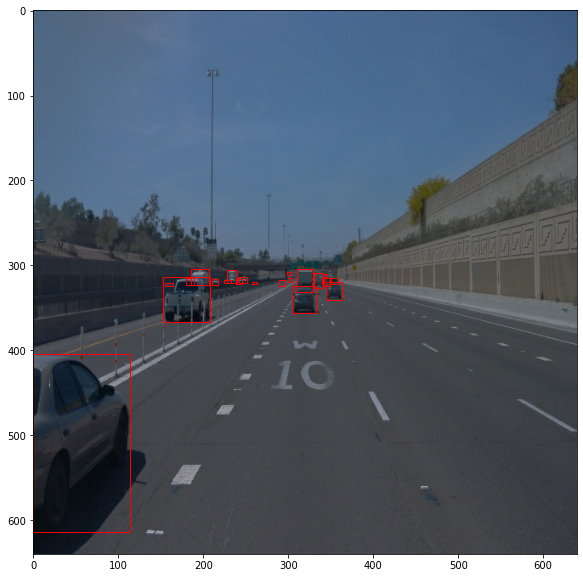

------------------
17


<Figure size 432x288 with 0 Axes>

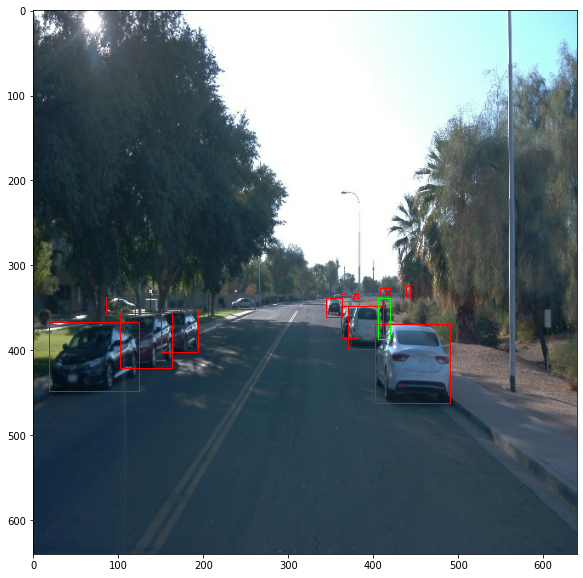

------------------
42


<Figure size 432x288 with 0 Axes>

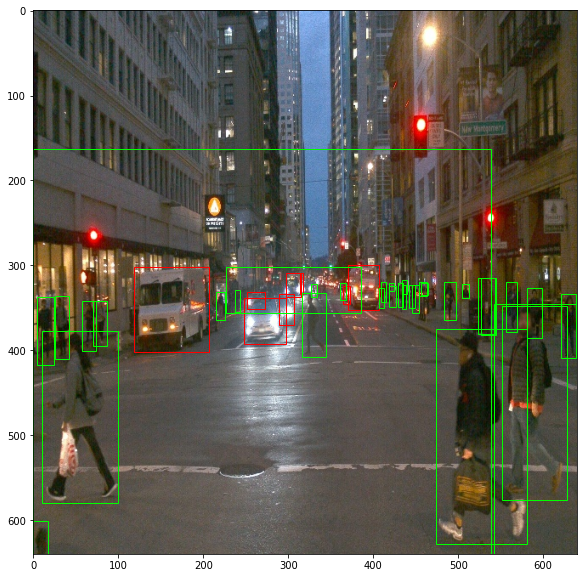

------------------
38


<Figure size 432x288 with 0 Axes>

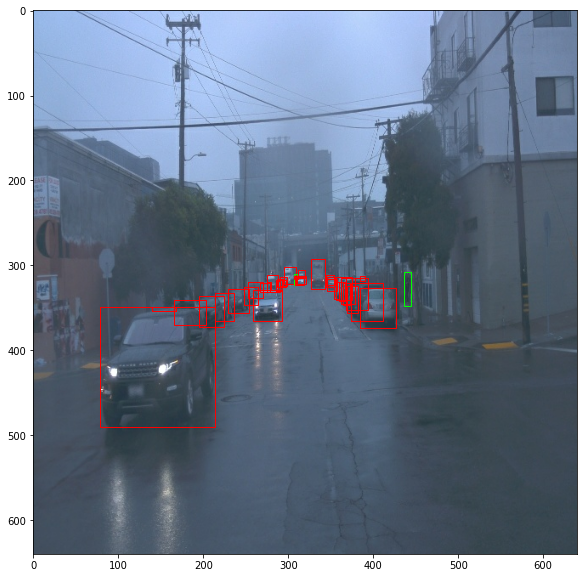

------------------
8


<Figure size 432x288 with 0 Axes>

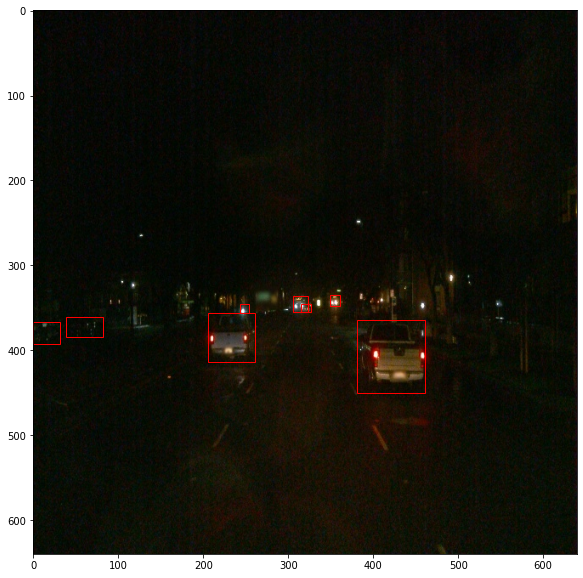

------------------
4


<Figure size 432x288 with 0 Axes>

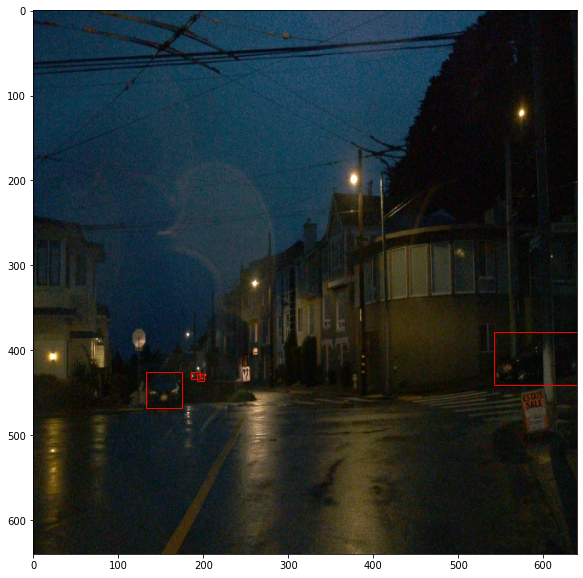

------------------
33


<Figure size 432x288 with 0 Axes>

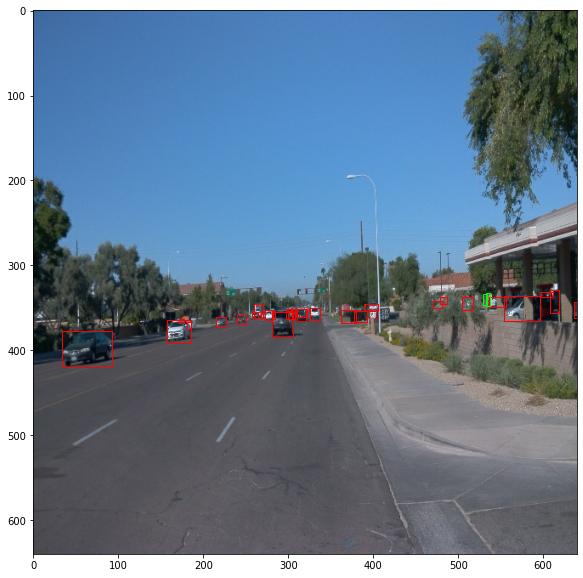

------------------
47


<Figure size 432x288 with 0 Axes>

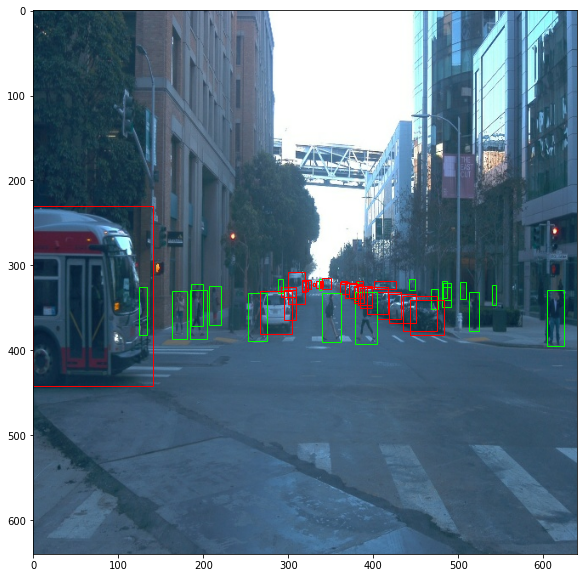

------------------
54


<Figure size 432x288 with 0 Axes>

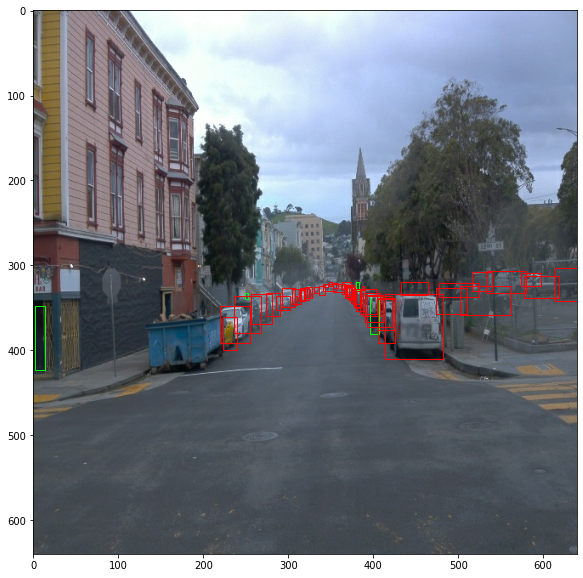

------------------
57


<Figure size 432x288 with 0 Axes>

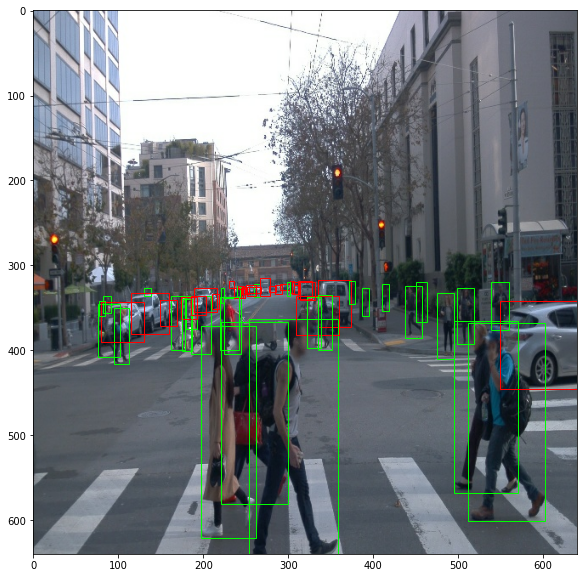

In [8]:
dataset = dataset.shuffle(100)
dataset = dataset.take(10)
for batch in dataset:
    display_instances(batch)   

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


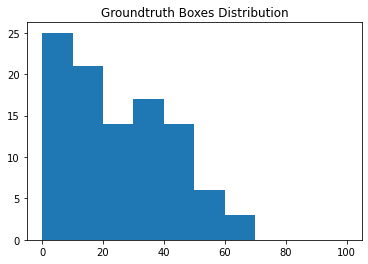

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from utils import get_dataset
%matplotlib inline

dataset = get_dataset("./data/train/*.tfrecord", label_map="./experiments/label_map.pbtxt")


def get_box_num(batch):
    classes = batch['groundtruth_classes'].numpy()
    boxes = batch['groundtruth_boxes'].numpy()
    count = len(boxes) 
    return count


dataset = dataset.shuffle(100)
dataset = dataset.take(100)

count_list = []
for batch in dataset:
    count_list.append(get_box_num(batch))

numBins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(count_list, numBins)
plt.title('Groundtruth Boxes Distribution')

plt.show()
# plt.savefig("mygraph.png")